## **Context** 

**Business Problem Understanding :**


Asuransi perjalanan adalah asuransi yang melindungi kita jika terjadi masalah selama perjalanan, seperti perjalanan dibatalkan atau kecelakaan. Perusahaan akan menentukan biaya premi asuransi setiap individu berdasarkan berbagai faktor seperti perlindungan apa saja yang diinginkan, durasi perjalanan, dan faktor lainnya.

Tantangan yang dihadapi oleh perusahaan adalah alokasi dana yang akurat. Terkadang, dana yang dialokasikan tidak akurat sehingga ketersediaan dana menjadi tidak memadai saat menghadapi klaim. Alhasil, perusahaan tidak siap menanggapi nasabah yang melakukan klaim, yang pada akhirnya dapat mengakibatkan kerugian.

Untuk mengatasi tantangan ini, perusahaan berkeinginan untuk memprediksi lebih dini pemegang polis mana yang akan melakukan klaim asuransi.

Target:

0, Tidak Mengklaim asuransi <br>
1, Mengklaim asuransi


### **Problem Statement** 

Perusahaan ingin menyiapkan dana secara akurat agar siap untuk menanggani nasabah yang berisiko melakukan 'Klaim' asuransi. Perusahaan dapat mengalokasikan dana cadangan secara proaktif untuk menutupi potensi klaim, terutama dari pemegang polis berisiko tinggi. 

### **Goals**
Perusahaan ingin memprediksi 'Risiko Klaim Asuransi' untuk pemegang polis baru dengan menggunakan beberapa atribut. Analisis ini akan memanfaatkan data historis yang mencakup atribut seperti agency name, agency type, distribution channel, product name, gender, duration of travel, destination, net sales, commission, age, dan prior claim history. Tujuannya adalah untuk mengoptimalkan alokasi keuangan dan memastikan cadangan yang tepat untuk klaim yang berpotensial.

### **Analytical Approach**
Sebelum membuat model machine learning untuk memprediksi 'Risiko Klaim Asuransi', kita akan mempelajari atribut mana yang berkorelasi dengan variabel target kita 'Klaim'. Memilih atribut atau fitur yang tepat akan mengoptimalkan model untuk memprediksi target 'Y' kita seakurat mungkin.

### **Metric Evaluation**
- Kesalahan Tipe 1 : False Positive (diprediksi mengajukan klaim (1) namun pada kenyataannya tidak mengajukan klaim (0))
    - Konsekuensi : Mengalokasikan dana kepada para nasabah yang terprediksi akan melakukan klaim. Kemungkinan terjadinya dana berlebih karena ternyata dana tidak terpakai untuk para nasabah tersebut yang nyatanya tidak melakukan klaim.
    
- Kesalahan Tipe 2 : False Negative (diprediksi tidak mengajukan klaim (0) padahal pada kenyataannya mengajukan klaim (1))
    - Konsekuensi : Kekurangan dana yang membuat perusahaan tidak siap menanggapi para nasabah yang terprediksi tidak melakukan klaim padahal nyatanya melakukan klaim. Kemungkinan perusahaan merugi dan kehilangan kepercayaan dari nasabah. 
    
Penilaian yang akan digunakan adalah recall karena yang menjadi fokus utama adalah meminimalisir kesalahan tipe 2 atau False Negative agar perusahaan tidak berisiko mengalami tantangan finansial ketika seseorang mengajukan klaim.
    


## **Data Understanding** 

|No |Nama Kolom        |Deskripsi                                           |
|---|------------------|----------------------------------------------------|
|1. |*Agency*            |Nama agensi                                          |
|2. |*Agency Type*         |Tipe agen asuransi perjalanan (Maskapai atau perjalanan)|
|3. |*Distribution Channel*|Metode distribusi ('online' melalui platform digital atau 'offline' dengan metode tradisional seperti telepon atau kantor fisik)|
|4. |*Product Name*     |Nama produk asuransi perjalanan                     |
|5. |*Gender*    |Jenis kelamin dari yang diasuransikan               |
|6. |*Duration*            |Durasi perjalanan                                   |
|7. |*Destination*         |Tujuan perjalanan                                   |
|8. |*Net Sales*  |Harga penjualan polis asuransi perjalanan          |
|9. |*Commission (in value)*|Komisi yang diterima untuk agen asuransi perjalanan|
|10.|*Age*           |Usia dari yang diasuransikan                        |
|11.|*Claim*             |Status klaim                                        |

In [339]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [340]:
df = pd.read_csv('data_travel_insurance.csv')

In [341]:
# Melihat 5 baris pertama
df.head()

,Agency,Agency Type,Distribution Channel,Product Name,Gender,Duration,Destination,Net Sales,Commision (in value),Age,Claim
0,C2B,Airlines,Online,Annual Silver Plan,F,365,SINGAPORE,216.0,54.0,57,No
1,EPX,Travel Agency,Online,Cancellation Plan,NaN,4,MALAYSIA,10.0,0.0,33,No
2,JZI,Airlines,Online,Basic Plan,M,19,INDIA,22.0,7.7,26,No
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,NaN,20,UNITED STATES,112.0,0.0,59,No
4,C2B,Airlines,Online,Bronze Plan,M,8,SINGAPORE,16.0,4.0,28,No


In [342]:
# Informasi dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44328 entries, 0 to 44327
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                44328 non-null  object 
 1   Agency Type           44328 non-null  object 
 2   Distribution Channel  44328 non-null  object 
 3   Product Name          44328 non-null  object 
 4   Gender                12681 non-null  object 
 5   Duration              44328 non-null  int64  
 6   Destination           44328 non-null  object 
 7   Net Sales             44328 non-null  float64
 8   Commision (in value)  44328 non-null  float64
 9   Age                   44328 non-null  int64  
 10  Claim                 44328 non-null  object 
dtypes: float64(2), int64(2), object(7)
memory usage: 3.7+ MB


Dataset tersebut memiliki 44.328 baris dan 11 kolom. Dataset ini mencakup 2 kolom dengan tipe data float, 2 kolom dengan tipe data integer, dan 7 kolom dengan tipe data objek.

Sekilas, terlihat bahwa kolom 'jenis kelamin' memiliki sejumlah besar nilai null dari total 44.328 baris.

In [343]:
# Melihat Statistika Deskriptif
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Duration,44328.0,49.424292,109.153961,-1.0,9.0,22.0,53.00,4881.0
Net Sales,44328.0,40.550948,48.661970,-357.5,18.0,26.5,48.00,810.0
Commision (in value),44328.0,9.707692,19.625637,0.0,0.0,0.0,11.55,283.5
Age,44328.0,39.925600,13.954926,0.0,35.0,36.0,43.00,118.0


Secara mean dan median, distribusi dari setiap kolom numerik yang ada yaitu : 
1. Duration, *right-skewed*
2. Net Sales, *right-skewed*
3. Commmision (in value), *right-skewed*
4. Age, *right-skewed* - distribusi normal

**right-skewed* = mean > median

Terlihat nilai maksimal dan minimal yang cukup janggal pada :
1. Duration, nilai maksimal 4881 dan nilai minimal negatif yaitu -1
2. Net sales, nilai minimal negatif yaitu -375.5
3. Age, nilai maksimal 118 

In [344]:
# Melihat jumlah dan sampel nilai unik, nilai null, tipe data dari setiap kolom
col = []
for i in df.columns :
    if df[i].dtypes != object :
        col.append([i,df[i].nunique(),df[i].unique()[5::-1], df[i].isna().sum(), round(df[i].isna().sum()/len(df[i])*100,2),len(df[df[i]<0]),df[i].dtypes ])
    else : 
        col.append([i,df[i].nunique(),df[i].unique()[5::-1], df[i].isna().sum(), round(df[i].isna().sum()/len(df[i])*100,2),'0', df[i].dtypes ])
pd.DataFrame(col, columns =['Column name','Number of unique','The Unique Values', 'Number of null', '% null','Negative values','Datatype'])

,Column name,Number of unique,The Unique Values,Number of null,% null,Negative values,Datatype
0,Agency,16,"[ART, LWC, CWT, JZI, EPX, C2B]",0,0.00,0,object
1,Agency Type,2,"[Travel Agency, Airlines]",0,0.00,0,object
2,Distribution Channel,2,"[Offline, Online]",0,0.00,0,object
3,Product Name,26,"[1 way Comprehensive Plan, Bronze Plan, 2 way ...",0,0.00,0,object
4,Gender,2,"[M, nan, F]",31647,71.39,0,object
5,Duration,437,"[2, 8, 20, 19, 4, 365]",0,0.00,2,int64
6,Destination,138,"[THAILAND, KOREA, REPUBLIC OF, UNITED STATES, ...",0,0.00,0,object
7,Net Sales,1006,"[50.0, 16.0, 112.0, 22.0, 10.0, 216.0]",0,0.00,483,float64
8,Commision (in value),915,"[63.21, 9.1, 4.0, 7.7, 0.0, 54.0]",0,0.00,0,float64
9,Age,89,"[36, 28, 59, 26, 33, 57]",0,0.00,0,int64


Terdapat 11 kolom dalam dataset yang terdiri dari:

**1. Variabel kualitatif**

    a. Nominal
    - Gender 
    - Distribution Channel
    - Agency Type
    - Destination
    - Claim
    - Agency

    b. Ordinal
    - Product Name

**2. Variabel kuantitatif**

    a. Rasio
    - Duration
    - Net Sales
    - Commission in value
    - Age

**Kolom dengan nilai null adalah:**
- Gender, dengan 71,39% nilai null

**Kolom dengan nilai negatif adalah:**
- Duration (2 baris)
- Net Sales (483 baris)

Dari observasi ini, mungkin lebih baik untuk tidak menggunakan kolom 'Jenis Kelamin'.

In [345]:
# Melihat produk-produk milik setiap agensi
produk = []
for i in df['Agency'].unique():
   produk.append([i,df[df['Agency']==i]['Product Name'].nunique(),df[df['Agency']==i]['Product Name'].unique()])
pd.DataFrame(produk, columns = ['Agency','Number of product','Product Name'])

,Agency,Number of product,Product Name
0,C2B,5,"[Annual Silver Plan, Bronze Plan, Silver Plan,..."
1,EPX,3,"[Cancellation Plan, 2 way Comprehensive Plan, ..."
2,JZI,3,"[Basic Plan, Value Plan, Premier Plan]"
3,CWT,1,[Rental Vehicle Excess Insurance]
4,LWC,6,"[Single Trip Travel Protect Gold, Annual Trave..."
5,ART,2,"[24 Protect, Value Plan]"
6,CSR,2,"[Comprehensive Plan, Premier Plan]"
7,SSI,1,[Ticket Protector]
8,RAB,1,[Value Plan]
9,KML,2,"[Value Plan, Premier Plan]"


In [346]:
# Melihat data dengan durasi <0
df[df['Duration']<0]

,Agency,Agency Type,Distribution Channel,Product Name,Gender,Duration,Destination,Net Sales,Commision (in value),Age,Claim
26228,JZI,Airlines,Online,Basic Plan,NaN,-1,MALAYSIA,18.0,6.3,118,No
26494,JZI,Airlines,Online,Basic Plan,NaN,-1,BRUNEI DARUSSALAM,18.0,6.3,118,No


2 baris data ini akan dihapus sebab memiliki 2 anomali yaitu 'Duration' yang bernilai negatif dan 'Age' sebesar 118.

In [347]:
# Melihat semua baris dengan kondisi 'Agency' JZI, 'Destination' Malaysia, 'Net Sales' 18.0 dan 'Commision (in value)' 6.3
df[(df['Agency']=='JZI')&(df['Destination']=='MALAYSIA') &(df['Net Sales']==18.0)& (df['Commision (in value)']==6.3)]

,Agency,Agency Type,Distribution Channel,Product Name,Gender,Duration,Destination,Net Sales,Commision (in value),Age,Claim
185,JZI,Airlines,Online,Basic Plan,M,7,MALAYSIA,18.0,6.3,53,No
769,JZI,Airlines,Online,Basic Plan,M,6,MALAYSIA,18.0,6.3,58,No
789,JZI,Airlines,Online,Basic Plan,M,12,MALAYSIA,18.0,6.3,47,No
946,JZI,Airlines,Online,Basic Plan,M,2,MALAYSIA,18.0,6.3,42,No
1334,JZI,Airlines,Online,Basic Plan,F,4,MALAYSIA,18.0,6.3,32,No
...,...,...,...,...,...,...,...,...,...,...,...
43499,JZI,Airlines,Online,Basic Plan,F,99,MALAYSIA,18.0,6.3,40,No
43784,JZI,Airlines,Online,Basic Plan,F,3,MALAYSIA,18.0,6.3,36,No
43788,JZI,Airlines,Online,Basic Plan,M,5,MALAYSIA,18.0,6.3,68,No
44021,JZI,Airlines,Online,Basic Plan,F,1,MALAYSIA,18.0,6.3,45,No


In [348]:
# Melihat semua baris dengan 'Age'>100
df[df['Age']>100]

,Agency,Agency Type,Distribution Channel,Product Name,Gender,Duration,Destination,Net Sales,Commision (in value),Age,Claim
99,ART,Airlines,Online,Value Plan,M,7,MALAYSIA,29.0,10.15,118,No
105,JZI,Airlines,Offline,Basic Plan,NaN,16,INDONESIA,37.0,12.95,118,No
363,JWT,Airlines,Online,Value Plan,F,12,INDIA,39.0,15.60,118,No
373,JWT,Airlines,Online,Value Plan,M,6,INDIA,39.0,15.60,118,No
727,JWT,Airlines,Online,Value Plan,F,76,INDIA,100.0,40.00,118,No
...,...,...,...,...,...,...,...,...,...,...,...
44089,JWT,Airlines,Online,Value Plan,M,42,INDIA,31.0,12.40,118,No
44140,JWT,Airlines,Online,Value Plan,M,84,INDIA,93.0,37.20,118,No
44150,JWT,Airlines,Online,Value Plan,M,5,INDIA,39.0,15.60,118,No
44160,JWT,Airlines,Online,Value Plan,M,0,INDIA,31.0,12.40,118,No


Terlihat bahwa mayoritas data dengan 'Age' 118 memiliki nama agensi yang sama yaitu 'JMT'. 

## **Data Cleaning**

### 1. Menghapus kolom 'Gender'

In [350]:
df.drop(['Gender'], axis = 1, inplace = True)

Kolom 'Gender' dihapus karena memiliki persentase nilai null yang sangat besar yaitu (71%)


### 2. Menghapus baris dengan durasi -1

In [351]:
df.drop([26228,26494], axis = 0, inplace = True)

Baris-baris dengan index 26228 dan 26494 dihapus karena mungkin akan mengganggu data dengan nilai durasi yang tidak normal yaitu minus, umur pemegang polis yaitu 118, serta jumlah baris seperti hanya 2 (cukup sedikit).

### 3. Menghapus duplikat

In [352]:
df.drop_duplicates(inplace = True)

Nilai-nilai duplikat dihapus guna menghindari overfitting dan bias model. 

### 4. Mengubah data categorical menjadi nominal ada kolom 'Claim'

In [353]:
df['Claim']= np.where(df['Claim']=='Yes', 1,0)

Jika status claim adalah 'Yes' maka nilainya akan diwakili oleh 1 sedangkan sebaliknya jika status claim 'No' maka nilainya adalah 0.

## **Exploratory Data Analysis**

### 1. Melihat distribusi

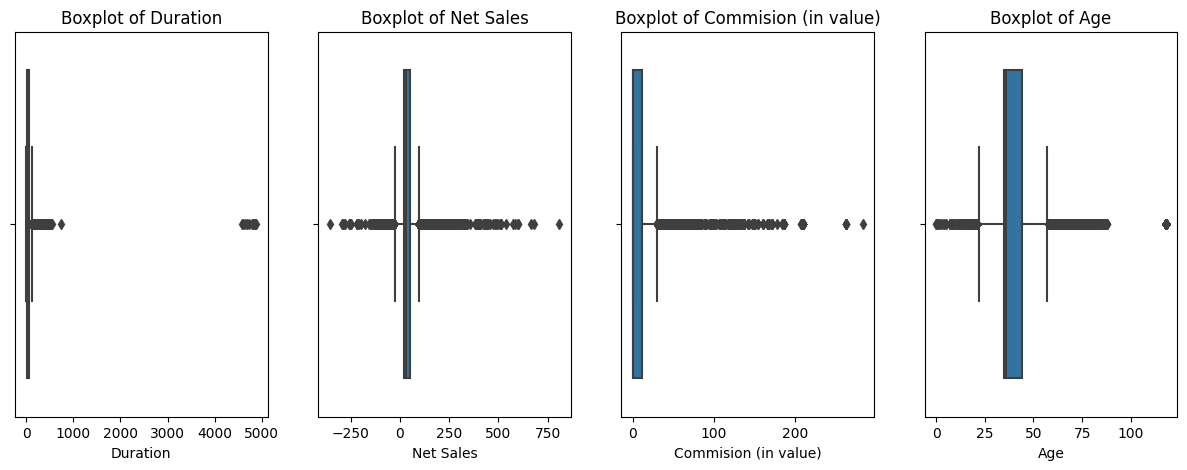

In [354]:
fig, axes = plt.subplots(1,4, figsize = (15,5))
numcol = ['Duration','Net Sales', 'Commision (in value)', 'Age']
for ax,i in zip(axes,numcol) :
    sns.boxplot(data = df, x = i, ax = ax)
    ax.set_title(f'Boxplot of {i}')

Distribusi semua data numerik terlihat right-skewed atau positively skewed. Terdapat outliers pada setiap kolom numerik. Semua outliers yang memiliki jarak yang jauh dari boxplot dengan frekuensi yang sedikit pada setiap kolom akan dihapus karena dianggap sebagai anomali dan dapat mengubah model secara keseluruhan, sehingga akan lebih baik jika dihapus. 

### 2. Melihat anomali

#### Kolom 'Duration'

In [355]:
# Pada kolom 'Duration' 
display(df[df['Duration']>4000])
len(df[df['Duration']>4000])

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim
87,SSI,Airlines,Online,Ticket Protector,4736,SINGAPORE,0.32,0.09,48,0
4678,SSI,Airlines,Online,Ticket Protector,4857,SINGAPORE,0.32,0.09,48,0
10172,SSI,Airlines,Online,Ticket Protector,4815,SINGAPORE,0.32,0.09,48,0
12140,SSI,Airlines,Online,Ticket Protector,4652,SINGAPORE,0.32,0.09,48,0
19497,SSI,Airlines,Online,Ticket Protector,4881,SINGAPORE,0.13,0.04,48,0
20038,SSI,Airlines,Online,Ticket Protector,4844,SINGAPORE,0.32,0.09,48,0
22215,SSI,Airlines,Online,Ticket Protector,4580,SINGAPORE,0.32,0.09,48,0
25606,SSI,Airlines,Online,Ticket Protector,4685,SINGAPORE,0.32,0.09,48,0
28032,SSI,Airlines,Online,Ticket Protector,4829,SINGAPORE,0.32,0.09,48,0
37207,SSI,Airlines,Online,Ticket Protector,4609,SINGAPORE,0.32,0.09,48,0


13

Terdapat 13 baris dengan 'Duration' > 4000 yang memiliki kesamaan dalam hal kolom 'Agency','Agency Type','Distribution Channel','Product Name', 'Destination', 'Age', dan'Claim'. 'Commision (in value)' dan 'Net Sales' cenderung bernilai 0.09 dan 0.32, akan tetapi terdapat yang bernilai 0.04 dan 0.13 (index 19497).    

In [356]:
# Mencari median dari 'Duration' dengan ketentuan yaitu value mayoritas yang dimiliki oleh kolom-kolom dengan nilai 'Duration' diatas 4000
df[(df['Agency Type']=='Airlines')&(df['Destination']=='SINGAPORE')
   & (df['Product Name']=='Ticket Protector')&(df['Commision (in value)']<=0.09)
   &(df['Net Sales']<=0.32)& (df['Duration']<4000)]['Duration'].median()

116.0

Median yang didapatkan adalah 116 dimana nilai ini akan digantikan untuk duration yang > 4000 sebab median 116 mewakili data yang memiliki karakteristik kolom yang sama dengan data duration >4000 (Karakteristik kolom yaitu  'Agency Type'= 'Airlines','Product Name' = 'Ticket Protector' dan sebagainya). Selain itu data dengan nilai 'Comission (in value)' dan 'Net Sales' yang sama yaitu 0.09 dan 0.32 hanya akan disisakan 1 baris data saja agar tidak terjadi overfitting model.

In [357]:
# Menghapus baris-baris duplikat dengan net sales 0.32 dan commision in value 0.09 serta duration 4000
dur4 = df[(df['Duration']>4000)&(df['Net Sales']==0.32)&(df['Commision (in value)']==0.09)].index[1:] # menyisakan 1 baris dengan karakteristik kolom tersebut
df.drop(dur4, inplace = True)

In [358]:
# Mengubah baris-baris dengan duration > 4000 dengan median 116
df['Duration']=df['Duration'].replace([4736,4881],116)

<Axes: xlabel='Duration'>

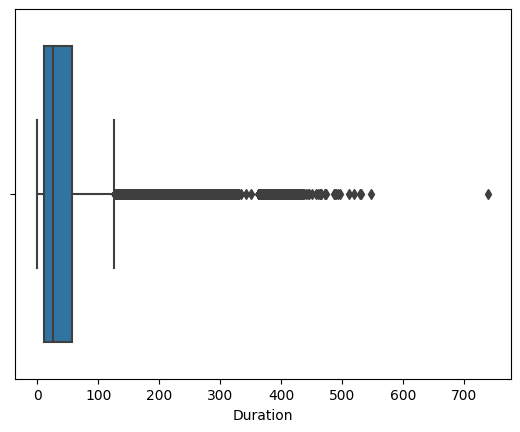

In [359]:
# Melihat kembali boxplot 'Duration'
sns.boxplot(data = df, x = 'Duration')

Terdapat 1 datapoint dengan 'Duration' > 700. Sebab jumlahnya hanya 1, berjarak jauh dari outlier terakhir, dan dapat mengganggu data, maka data point ini akan didrop. 

In [360]:
# Menghapus 1 datapoint dengan 'Duration'>700
df.drop(df[df['Duration']>700].index, inplace = True)

<Axes: xlabel='Duration'>

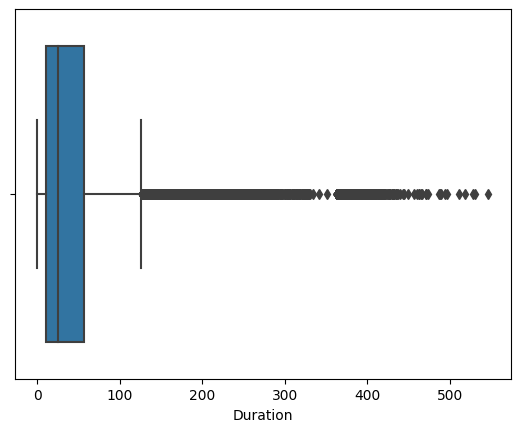

In [361]:
# Melihat kembali boxplot 'Duration'
sns.boxplot(data = df, x = 'Duration')

#### Kolom 'Net Sales'

In [362]:
# Pada kolom 'Net Sales'
df[df['Net Sales']>600]

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim
2810,C2B,Airlines,Online,Annual Gold Plan,364,SINGAPORE,666.0,166.5,31,0
16075,C2B,Airlines,Online,Bronze Plan,179,SINGAPORE,682.0,170.5,25,0
42971,JZI,Airlines,Online,Value Plan,139,UNITED STATES,810.0,283.5,118,0


Baris indeks 42971 memiliki anomali pada kolom 'Net Sales' dan 'Commission (in value) sebab tergolong sebagai outlier yang jauh dari outlier sebelumnya yang terlihat pada boxplot. Maka ada baiknya jika baris dengan indeks ini dihapus.

In [363]:
# Drop indeks 42971 karena tergolong anomali pada kolom 'Net Sales' serta 'Commission (in value)'
df.drop(42971, axis = 0, inplace = True)

In [364]:
# Melihat 'Net Sales' yang bernilai 0
df[df['Net Sales']==0]


,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim
45,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,24,UNITED ARAB EMIRATES,0.0,23.76,27,0
60,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,14,AUSTRALIA,0.0,17.82,31,0
63,EPX,Travel Agency,Online,Cancellation Plan,100,UNITED STATES,0.0,0.00,37,0
75,C2B,Airlines,Online,Silver Plan,23,SINGAPORE,0.0,5.63,25,0
78,EPX,Travel Agency,Online,Cancellation Plan,73,BELGIUM,0.0,0.00,36,0
...,...,...,...,...,...,...,...,...,...,...
44168,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,13,CANADA,0.0,41.58,31,0
44207,EPX,Travel Agency,Online,2 way Comprehensive Plan,152,UNITED STATES,0.0,0.00,49,0
44268,JZI,Airlines,Online,Basic Plan,8,HONG KONG,0.0,12.25,69,0
44273,EPX,Travel Agency,Online,Cancellation Plan,52,PHILIPPINES,0.0,0.00,36,0


In [365]:
df.drop(df[df['Net Sales']==0].index, inplace = True)

In [366]:
# Melihat data 'Net Sales' yang minus
df[df['Net Sales']<0]

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim
94,C2B,Airlines,Online,Annual Silver Plan,365,SINGAPORE,-216.75,54.19,36,0
116,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,430,AUSTRALIA,-59.40,35.64,41,0
121,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,77,JAPAN,-29.70,17.82,59,0
199,EPX,Travel Agency,Online,Cancellation Plan,29,HONG KONG,-12.00,0.00,36,0
241,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,57,AUSTRALIA,-59.40,35.64,28,0
...,...,...,...,...,...,...,...,...,...,...
43694,EPX,Travel Agency,Online,2 way Comprehensive Plan,140,UNITED STATES,-98.00,0.00,29,0
43743,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,23,MALAYSIA,-29.70,17.82,29,0
43751,EPX,Travel Agency,Online,2 way Comprehensive Plan,147,SPAIN,-68.00,0.00,36,0
43858,EPX,Travel Agency,Online,Cancellation Plan,49,UNITED KINGDOM,-68.00,0.00,36,0


'Net Sales' atau pendapatan dari penjualan asuransi tidak seharusnya bernilai minus. Sebab setiap baris dari dataset ini mewakili data dari tiap pemegang polis. Tidak masuk akal jika mendapat kerugian dengan 'Net Sales' minus dalam penjualan asuransi kepada satu orang saja. 

Maka Net Sales yang bernilai minus akan dianggap terjadi karena kesalahan sistem dan diubah menjadi bernilai positif. 

In [367]:
# Membuat nilai net sales minus menjadi positive
df['Net Sales'] = np.where(df['Net Sales']<0,abs(df['Net Sales']), df['Net Sales'])


<Axes: xlabel='Net Sales'>

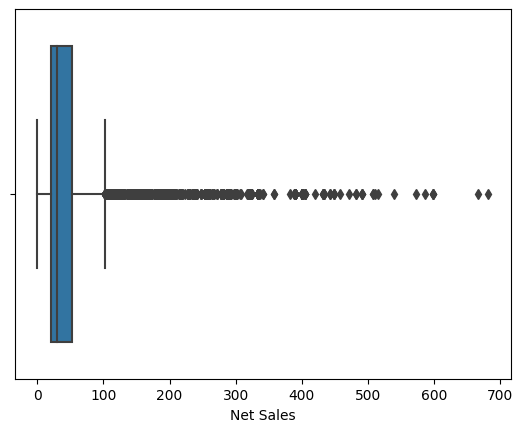

In [368]:
# Melihat kembali boxplot 'Net Sales'
sns.boxplot(data = df, x = 'Net Sales')

#### Kolom 'Commision (in value)'

In [572]:
# Pada kolom 'Commision (in value)'
df[df['Commision (in value)']>250]

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim
10325,LWC,Travel Agency,Online,Annual Travel Protect Platinum,365,UNITED STATES,404.25,262.76,58,0
14556,LWC,Travel Agency,Online,Annual Travel Protect Platinum,378,UNITED STATES,404.25,262.76,45,0
16613,LWC,Travel Agency,Online,Annual Travel Protect Platinum,365,UNITED STATES,404.25,262.76,42,0
23083,LWC,Travel Agency,Online,Annual Travel Protect Platinum,364,UNITED STATES,404.25,262.76,44,0
26407,LWC,Travel Agency,Online,Annual Travel Protect Platinum,371,UNITED STATES,404.25,262.76,38,0
39830,LWC,Travel Agency,Online,Annual Travel Protect Platinum,369,UNITED STATES,404.25,262.76,51,0


In [370]:
df[df['Product Name'] =='Annual Travel Protect Platinum']

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim
4101,LWC,Travel Agency,Online,Annual Travel Protect Platinum,389,UNITED STATES,323.40,210.21,38,0
6726,LWC,Travel Agency,Online,Annual Travel Protect Platinum,366,UNITED STATES,323.40,210.21,47,0
7018,LWC,Travel Agency,Online,Annual Travel Protect Platinum,382,UNITED STATES,323.40,210.21,36,0
7636,LWC,Travel Agency,Online,Annual Travel Protect Platinum,364,UNITED STATES,323.40,210.21,42,0
7889,LWC,Travel Agency,Online,Annual Travel Protect Platinum,365,UNITED STATES,323.40,210.21,40,0
8639,LWC,Travel Agency,Online,Annual Travel Protect Platinum,380,UNITED STATES,323.40,210.21,62,0
9302,LWC,Travel Agency,Online,Annual Travel Protect Platinum,381,UNITED STATES,323.40,210.21,41,0
10325,LWC,Travel Agency,Online,Annual Travel Protect Platinum,365,UNITED STATES,404.25,262.76,58,0
14228,LWC,Travel Agency,Online,Annual Travel Protect Platinum,408,UNITED STATES,323.40,210.21,36,0
14556,LWC,Travel Agency,Online,Annual Travel Protect Platinum,378,UNITED STATES,404.25,262.76,45,0


'Commision (in value)' yang besar (>250 ) mungkin disebabkan jenis produknya yaitu 'Annual Travel Protect Platinum' yang memang merupakan produk asuransi yang mahal sehingga cukup masuk akal untuk tidak menghapus 6 outlier pada 'Commision (in value)'

<Axes: xlabel='Commision (in value)'>

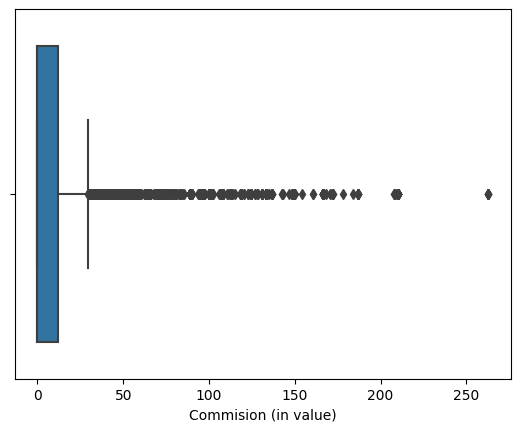

In [371]:
# Melihat kembali boxplot 'Commision (in value)'
sns.boxplot(data = df, x = 'Commision (in value)')

#### Kolom 'Age'

In [372]:
# Pada Kolom 'Age'
df[df['Age']>100]

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim
99,ART,Airlines,Online,Value Plan,7,MALAYSIA,29.0,10.15,118,0
105,JZI,Airlines,Offline,Basic Plan,16,INDONESIA,37.0,12.95,118,0
363,JWT,Airlines,Online,Value Plan,12,INDIA,39.0,15.60,118,0
373,JWT,Airlines,Online,Value Plan,6,INDIA,39.0,15.60,118,0
727,JWT,Airlines,Online,Value Plan,76,INDIA,100.0,40.00,118,0
...,...,...,...,...,...,...,...,...,...,...
43838,JWT,Airlines,Online,Value Plan,67,INDIA,200.0,80.00,118,0
43856,JWT,Airlines,Online,Value Plan,10,INDIA,50.0,20.00,118,1
43928,JWT,Airlines,Online,Value Plan,83,INDIA,180.0,72.00,118,0
44089,JWT,Airlines,Online,Value Plan,42,INDIA,31.0,12.40,118,0


In [373]:
# Melihat unique value 'Age' dengan 'Agency' yang terlihat menjadi mayoritas yaitu 'JWT' 
df[df['Agency']=='JWT']['Age'].unique()

array([118], dtype=int64)

Unique value dari kolom "Age" ketika kondisi 'Agency' adalah 'JWT' hanya terdapat 1 yaitu umur 118. Maka walau angka ini termasuk outlier, data dari 'Agency' yaitu'JWT' akan ikut terhapus secara keseluruhan. 

<Axes: xlabel='Age'>

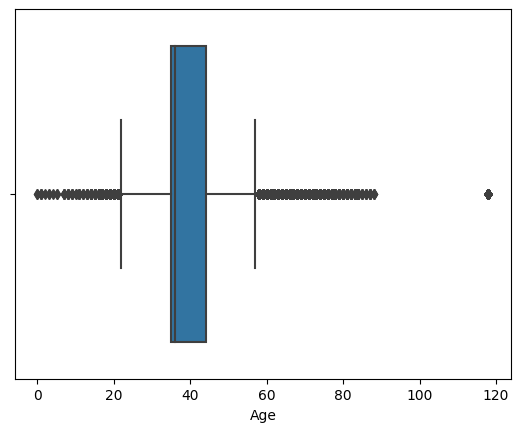

In [374]:
# Melihat kembali boxplot 'Age'
sns.boxplot(data = df, x = 'Age')

In [375]:
df.drop(df[df['Age']==118].index, inplace = True)

### 3. Analysis

[Text(0, 0, '5240'),
 Text(0, 0, '20619'),
 Text(0, 0, '4107'),
 Text(0, 0, '5047'),
 Text(0, 0, '437'),
 Text(0, 0, '188'),
 Text(0, 0, '68'),
 Text(0, 0, '693'),
 Text(0, 0, '436'),
 Text(0, 0, '228'),
 Text(0, 0, '323'),
 Text(0, 0, '66'),
 Text(0, 0, '46'),
 Text(0, 0, '93'),
 Text(0, 0, '62')]

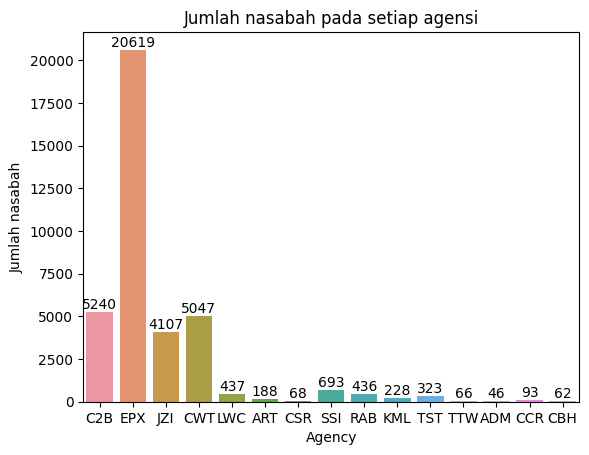

In [376]:
# Agency yang paling banyak digunakan 
ax = sns.countplot(data = df, x = 'Agency')
plt.title('Jumlah nasabah pada setiap agensi')
plt.ylabel('Jumlah nasabah')
ax.bar_label(ax.containers[0], fmt= '%0.0f', label_type='edge')

Agensi yang paling banyak dipakai antara nasabah-nasabah adalah EPX dengan jumlah 20,6k. Agensi dengan jumlah pengguna terbanyak kedua dan ketiga yaitu C2B (5.2k) dan CWT (5.04k) secara berurutan. 

[Text(0, 0, '431'), Text(0, 0, '235')]

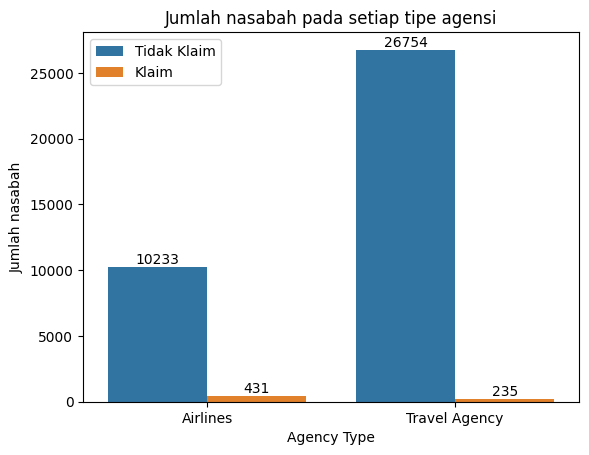

In [377]:
# Tipe Agency yang paling umum 
ax = sns.countplot(data = df, x = 'Agency Type', hue = 'Claim')
plt.title('Jumlah nasabah pada setiap tipe agensi')
plt.ylabel('Jumlah nasabah')
plt.legend(['Tidak Klaim','Klaim'])
ax.bar_label(ax.containers[0], fmt= '%0.0f', label_type='edge')
ax.bar_label(ax.containers[1], fmt= '%0.0f', label_type='edge')

Berdasarkan bar plot diatas, lebih banyak orang mengambil asuransi agensi travel dibandingkan airline dengan jumlah pemegang polis sebanyak 26.7 k dan 10.2 k secara berurutan. 

Walau proporsi pemegang polis 'Travel Agency' lebih besar, ternyata orang-orang yang melakukan klaim asuransi lebih banyak adalah orang-orang dengan tipe agensi 'Airlines' dibandingkan 'Travel agency', hampir 2 kali lipat lebih banyak 'Airlines'. 

[Text(0, 0, '658'), Text(0, 0, '8')]

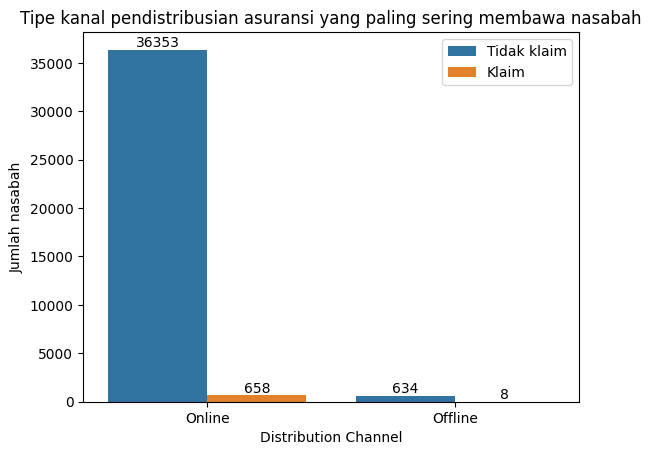

In [378]:
# Kanal pendistribusian asuransi yang paling banyak 

ax = sns.countplot(data = df, x = 'Distribution Channel', hue = 'Claim')
plt.title('Tipe kanal pendistribusian asuransi yang paling sering membawa nasabah')
plt.ylabel('Jumlah nasabah')
plt.legend(['Tidak klaim','Klaim'])
ax.bar_label(ax.containers[0], fmt= '%0.0f', label_type='edge')
ax.bar_label(ax.containers[1], fmt= '%0.0f', label_type='edge')

Cara menawarkan asuransi dengan cara online seperti telepon, aplikasi, dan lain sebagainya, terlihat lebih efektif dalam menarik calon pemegang polis dibanding dengan cara offline. Selain itu, terlihat bahwa orang-orang yang mengklaim asuransi adalah orang-orang yang ditawarkan asuransi secara online. 

Sebab mayoritas data ada pada kanal distribusi online (37.3k) serta individu yang melakukan klaim lebih banyak pada kanal distribusi online (662), maka sebaiknya kolom ini tidak dipakai pada modeling untuk mencegah pembelajaran oleh model bahwa orang-orang yang melakukan 'Klaim' asuransi pasti melalui jalur distribusi online.

0    36
Name: Age, dtype: int64

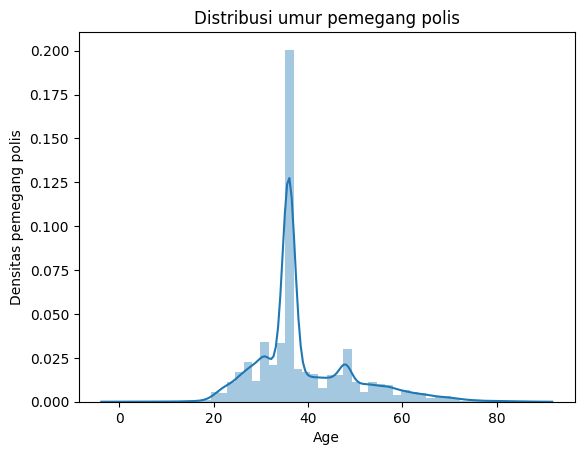

In [379]:
# Umur pemegang polis
plt.title('Distribusi umur pemegang polis')
plt.ylabel('Densitas pemegang polis')
sns.distplot(df['Age'])
display(df['Age'].mode())

- Orang-orang berumur 20 tahun mulai memerlukan asuransi perjalanan dimana distribusi umur mulai terlihat meningkat pada umur 20.
- Peak umur pemilik asuransi ada di sekitar < 40 tahun dimana modus 'Age' adalah 36 tahun, dengan densitas hampir mencapai 0.16. 
- Setelah umur 40 tahun, terdapat penurunan drastis banyaknya pemilik asuransi perjalanan. Hal ini mungkin disebabkan orang-orang pra-lansia (45-59 tahun) hingga lansia tua (80 -89 tahun) mulai jarang melakukan perjalanan ke luar negeri. Terlihat setelah umur 80 tahun, kurva sudah tidak terlihat.

Sumber pengelompokkan umur : 
https://kecamatansukaraja.bogorkab.go.id/pages/2971#:~:text=Lanjut%20usia%20merupakan%20seseorang%20yang,89%20tahun%20merupakan%20lansia%20tua. 

0    20.0
Name: Net Sales, dtype: float64

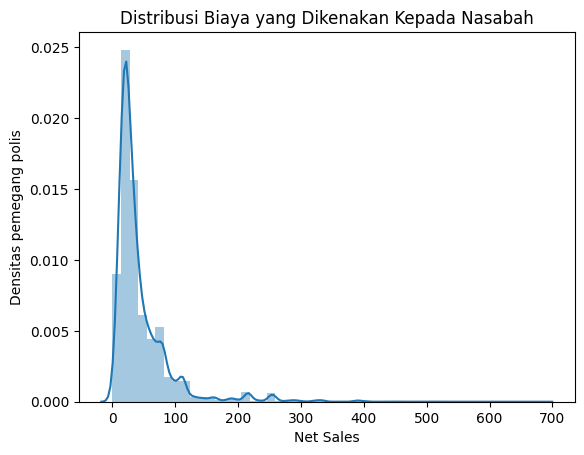

In [613]:
# Biaya yang dibayarkan pemegang polis
plt.title('Distribusi Biaya yang Dikenakan Kepada Nasabah')
plt.ylabel('Densitas pemegang polis')
sns.distplot(df['Net Sales'])
display(df['Net Sales'].mode())

- Peak biaya yang paling sering sering dikeluarkan pemilik asuransi adalah 20 dollar 

[Text(0, 0, '10825'),
 Text(0, 0, '7984'),
 Text(0, 0, '5047'),
 Text(0, 0, '3540'),
 Text(0, 0, '2590'),
 Text(0, 0, '1810'),
 Text(0, 0, '1463'),
 Text(0, 0, '1194'),
 Text(0, 0, '833'),
 Text(0, 0, '693')]

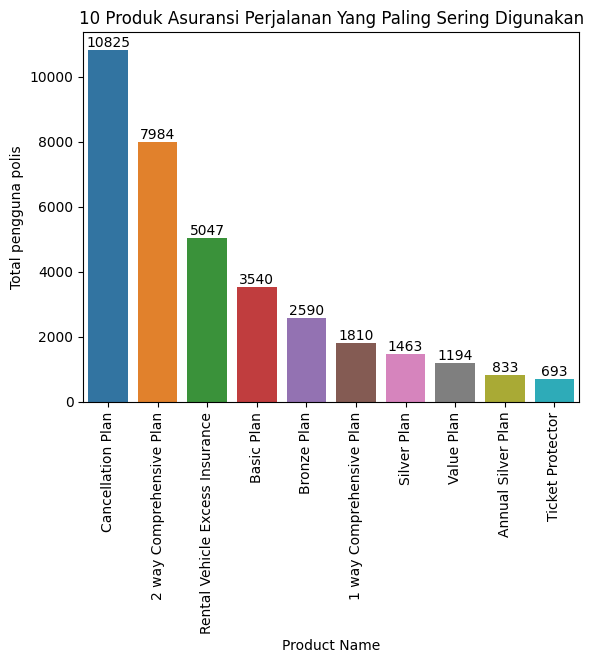

In [628]:
top10p = df.groupby('Product Name')['Agency'].count().reset_index().sort_values(by ='Agency', ascending = False).head(10)
ax = sns.barplot(data = top10p, x = 'Product Name', y = 'Agency')
plt.xticks(rotation = 90)
plt.ylabel('Total pengguna polis')
plt.title('10 Produk Asuransi Perjalanan Yang Paling Sering Digunakan')
ax.bar_label(ax.containers[0],fmt ='%0.0f', label_type='edge')

Produk utama yang paling sering dimiliki pemegang polis adalah Cancellation plan dengan jumlah nasabah yaitu 10.8 ribu. Pada peringkat kedua terdapat produk 2 way Comprehensive plan dengan jumlah nasabah 7.9 ribu dan peringkat ketiga terdapat produk Rental Vehicle Excess Insurance dengan jumlah nasabah 5 ribu. 

[Text(0, 0, '7944'),
 Text(0, 0, '3558'),
 Text(0, 0, '2998'),
 Text(0, 0, '2863'),
 Text(0, 0, '2271'),
 Text(0, 0, '1991'),
 Text(0, 0, '1663'),
 Text(0, 0, '1534'),
 Text(0, 0, '1430'),
 Text(0, 0, '1332')]

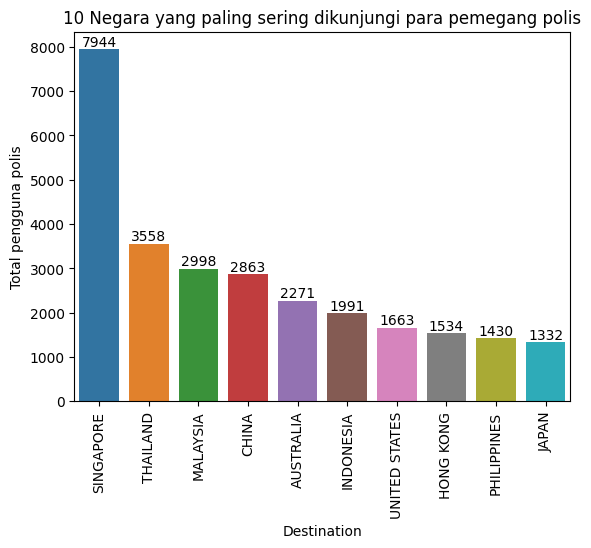

In [380]:
top10 = df.groupby('Destination')['Agency'].count().reset_index().sort_values(by ='Agency', ascending = False).head(10)
ax = sns.barplot(data = top10, x = 'Destination', y = 'Agency')
plt.xticks(rotation = 90)
plt.ylabel('Total pengguna polis')
plt.title('10 Negara yang paling sering dikunjungi para pemegang polis')
ax.bar_label(ax.containers[0],fmt ='%0.0f', label_type='edge')

Singapura menjadi negara paling sering diminati pemegang polis dengan total pengunjung yaitu 8106 orang. Posisi kedua yang dimiliki oleh Thailand memiliki jumlah pengunjung yang jauh lebih rendah daripada singapura yaitu 3659 orang. Posisi ketiga hingga ke sepuluh mengalami penurunan jumlah pengunjung akan tetapi tidak terlalu jauh berbeda satu dengan yang lain (tidak seperti selisih Singapura dan Thailand). 

Text(0.5, 1.0, 'Proporsi pemilik asuransi yang melakukan klaim dan tidak melakukan klaim')

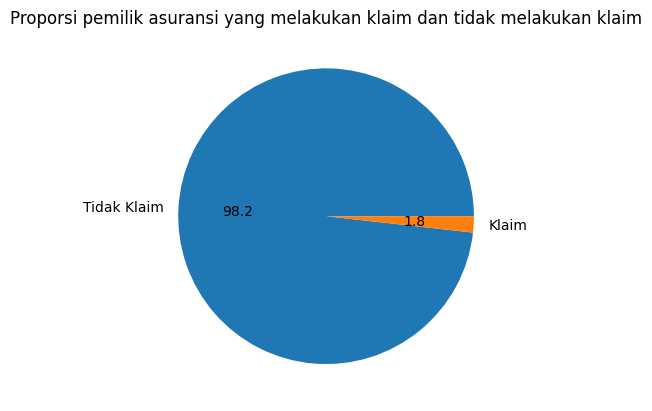

In [381]:
# Melihat jumlah pemegang polis yang melakukan klaim dan tidak klaim
plt.pie(df['Claim'].value_counts()/len(df['Claim']),labels = {'Klaim','Tidak Klaim'},autopct = f'%.1f')
plt.title('Proporsi pemilik asuransi yang melakukan klaim dan tidak melakukan klaim')


Dataset ini mengandung 98.2 % orang-orang yang tidak melakukan klaim dan sisa 1.8% orang melakukan klaim. Perbandingan keduanya sangat tidak seimbang (imbalance).

Text(0, 0.5, 'Jumlah Nasabah')

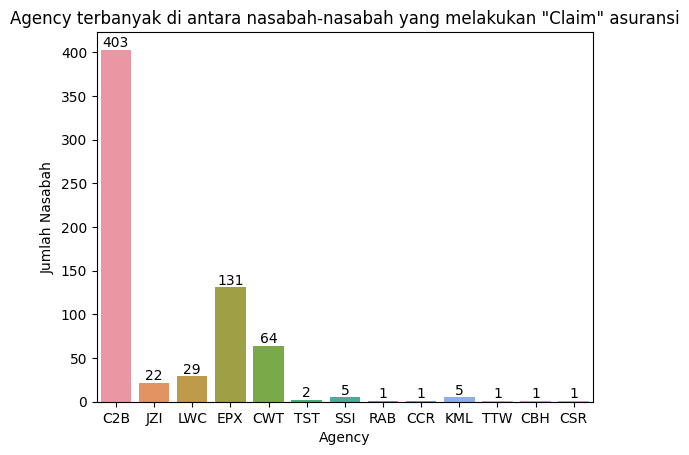

In [382]:
# Analisa data individu yang melakukan klaim saja 
ax = sns.countplot(data = df[df['Claim']== 1], x = 'Agency')
ax.bar_label(ax.containers[0], fmt = '%0.0f',label_type = 'edge')
plt.title('Agency terbanyak di antara nasabah-nasabah yang melakukan "Claim" asuransi')
plt.ylabel('Jumlah Nasabah')


Ketika hanya memvisualisasi data individu yang melakukan klaim, 3 Agency yang paling banyak digunakan pemegang polis berubah menjadi C2B (403), EPX (131), CWT(64) dimana sebelumnya tanpa melakukan filter klaim ini urutan agencynya adalah EPX (20.6k), C2B(5.2k) ,CWT(5.0k).


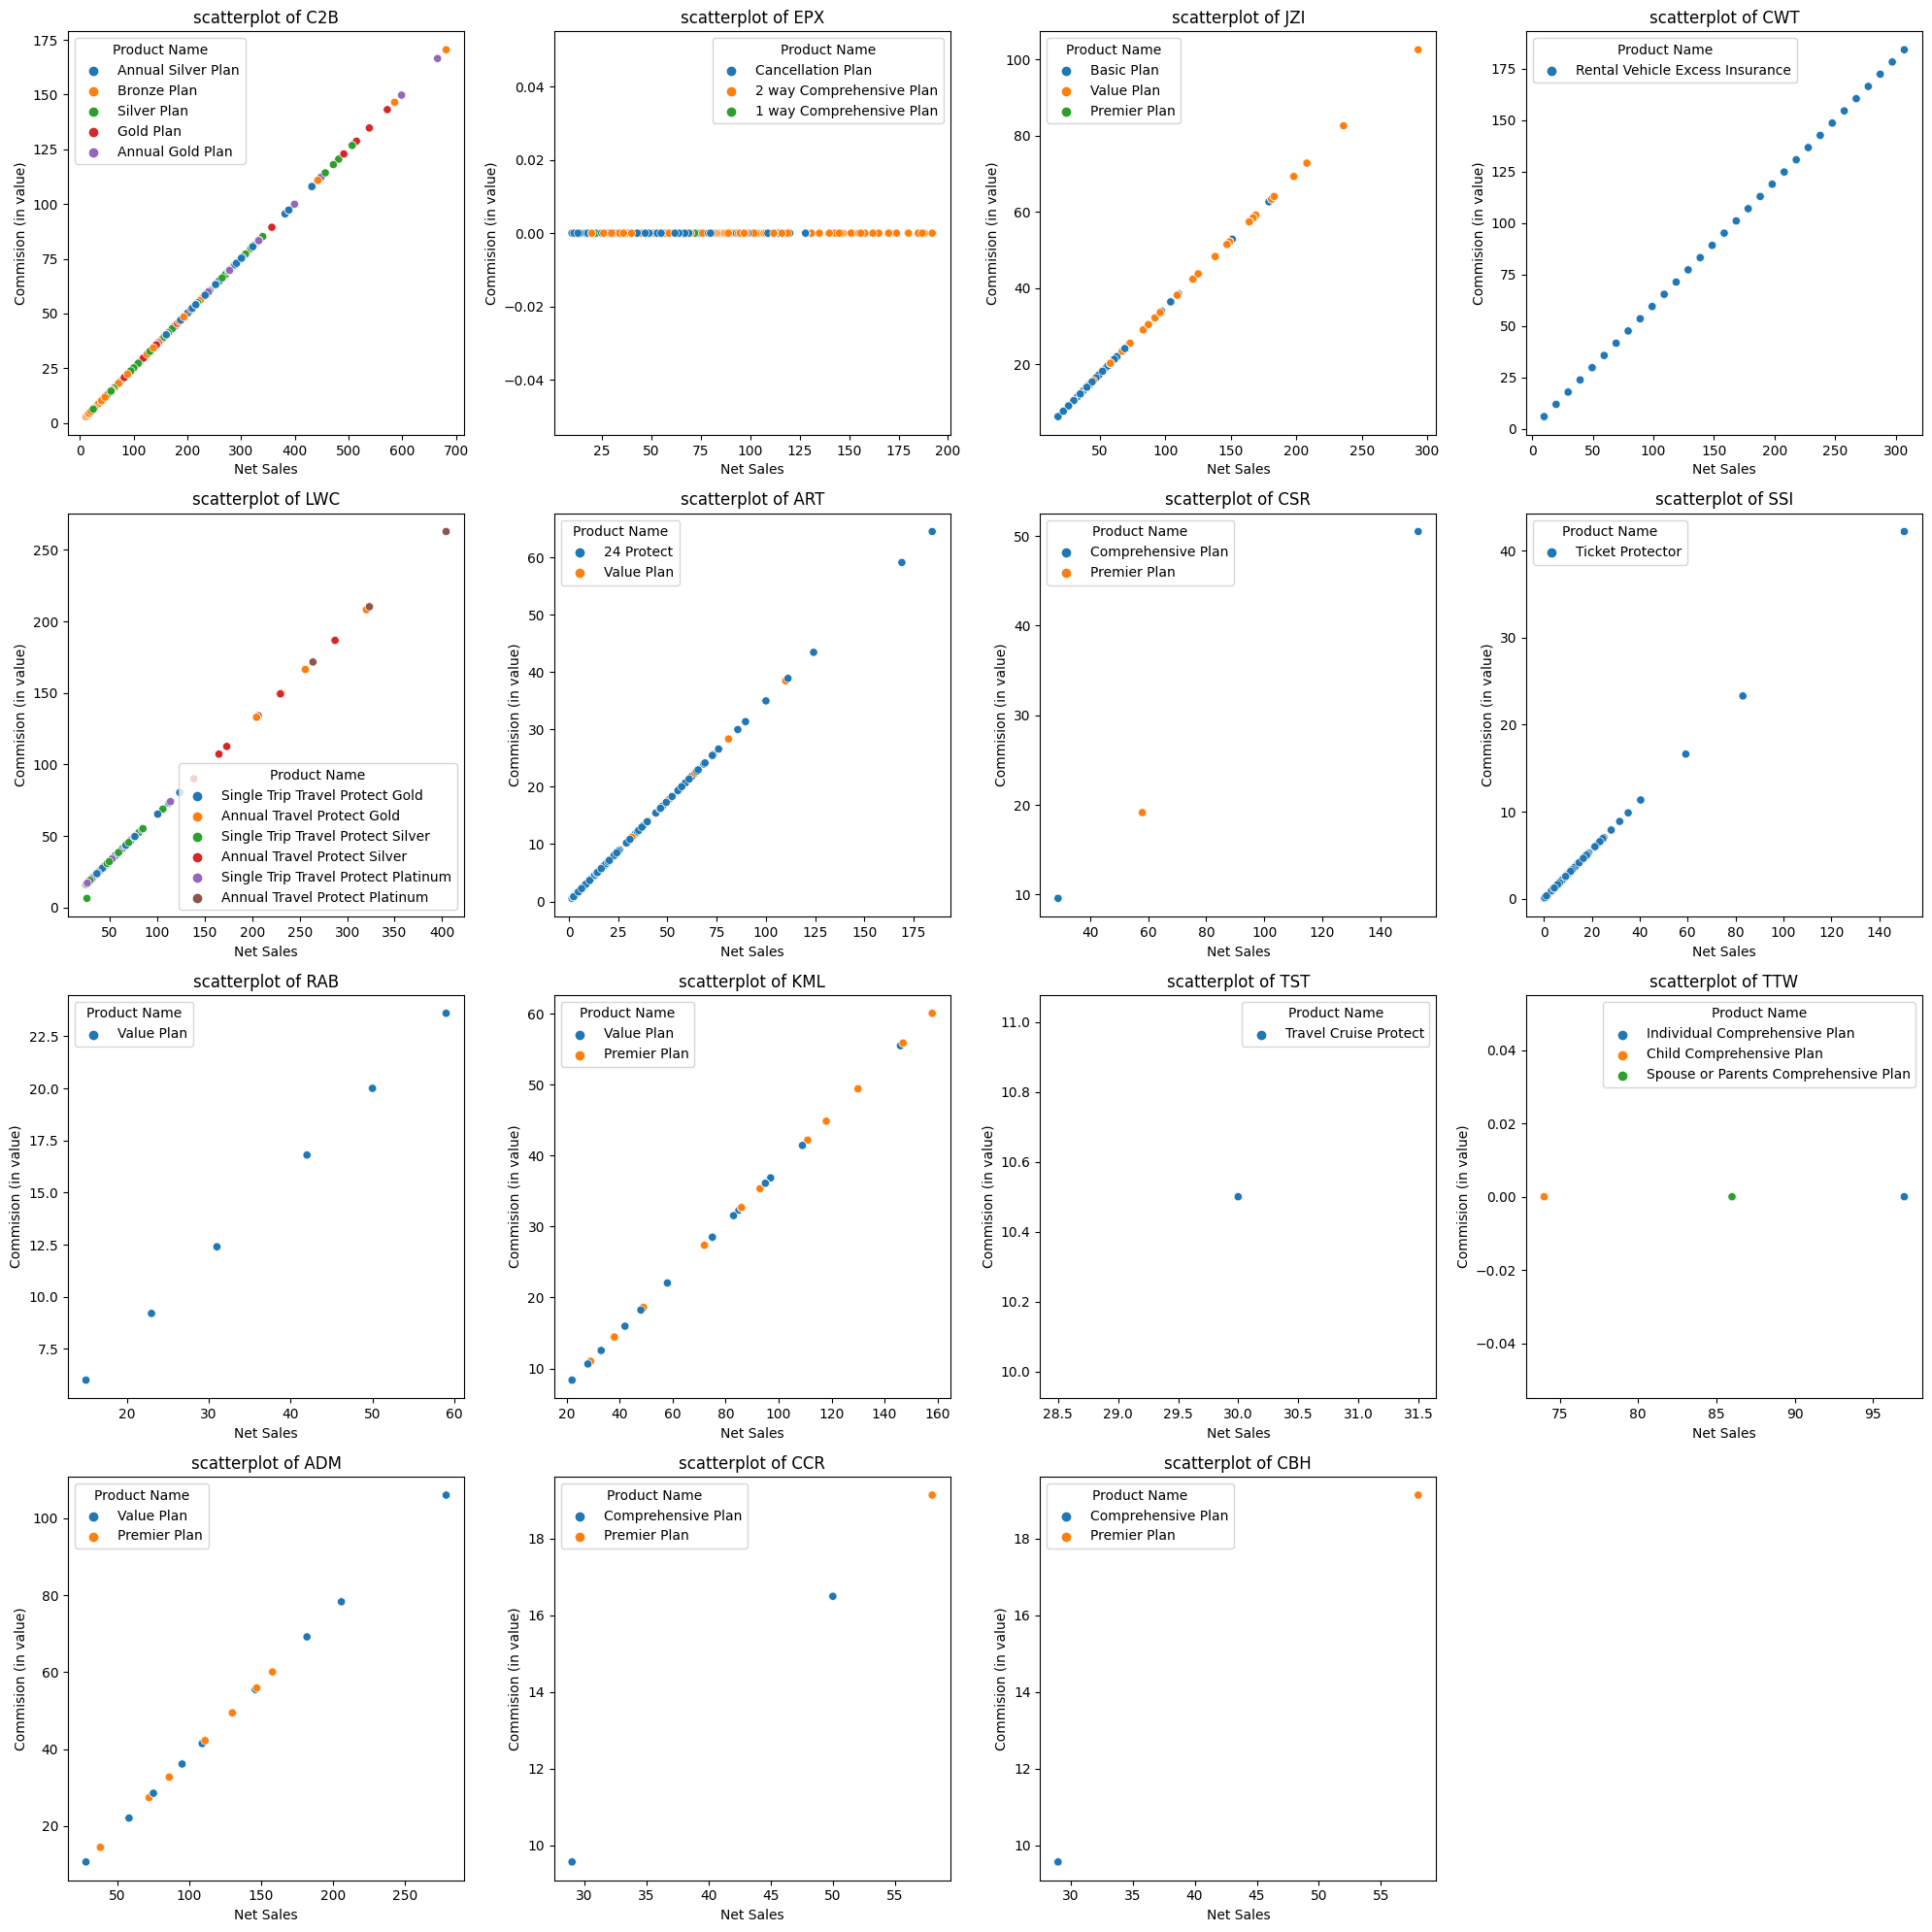

In [383]:
plt.figure(figsize=(20, 20))
for i, column in enumerate(df['Agency'].unique(), 1):
    plt.subplot(4, 4, i)
    plt.title(f'scatterplot of {column}')
    sns.scatterplot(data = df[df['Agency']==column], x = 'Net Sales', y = 'Commision (in value)', hue = 'Product Name')
    
plt.tight_layout()
plt.show()

Ketika melakukan scatterplot antara 'Net Sales' dan 'Commision (in value)' dari setiap agensi, terlihat bahwa seluruh agensi memiliki hubungan positif atau searah (ketika Net Sales meningkat maka Commision yang didapatkan akan meningkat) yang sangat linear antara kedua variable tersebut (linear secara sempurna). Melihat hubungan ini, maka akan lebih baik untuk menggunakan salah satu variable saja untuk mencegah terjadinya kolinearitas. 

<Axes: >

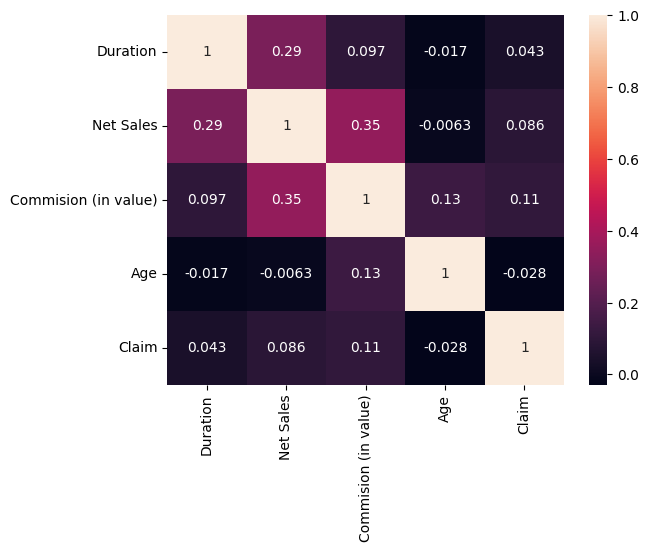

In [384]:
num = ['Duration', 'Net Sales', 'Commision (in value)', 'Age', 'Claim']
sns.heatmap(df[num].corr('spearman'), annot = True)

Korelasi yang paling tinggi dalam heatmap ini ada pada Net Sales dan Commision (in value) yaitu 0.35. 
Korelasi tertinggi kedua ada antara Net Sales dan Duration yaitu 0.29. 

## **Machine Learning**

Feature Engineering

Kolom - kolom berikut akan discaling dengan **Robust scaler** sebab kolom-kolom numerik ini memiliki banyak outliers dimana scaler ini tidak sensitive terhadap outliers:
- Duration
- Age
- Net Sales

Kolom ini akan di encode dengan **Onehot Encoder** sebab kolom kategorikal ini memiliki jumlah unique value yang tidak > dari 5 :
- Agency Type

Kolom-kolom ini akan di encode dengan **Binary Encoder** sebab kolom-kolom kategorikal ini memiliki jumlah unique value yang > 5 : 
- Agency
- Product Name
- Destination

Kolom - kolom yang tidak digunakan atau di**drop** : 
- Commision (in value), sebab mengalami multikolinearitas dengan Net Sales dan memiliki sejumlah nilai 0. 
- Distribution Channel, sebab mayoritas pemilik asuransi mendapatkan kanal distribusi online dimana pemilik asuransi yang melakukan klaim hampir seluruhnya mendapatkan kanal distribusi online. Dengan pembag

Seluruh pertimbangan ini akan dieksekusi pada pipeline dibawah menggunakan column transformer.



### 1. Pipeline

In [530]:
from sklearn.compose import ColumnTransformer, 
from sklearn.preprocessing import RobustScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
import category_encoders as ce

transformer = ColumnTransformer([('scaler',RobustScaler(),['Duration','Age','Net Sales']),
                                 ('OHE',OneHotEncoder(drop= 'first'), ['Agency Type']),
                                 ('Binary', ce.BinaryEncoder(),['Agency','Product Name','Destination'])],
                                 remainder = 'passthrough')


### 2. Train Test Split

In [531]:
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV, KFold, StratifiedKFold

x = df.drop(['Claim','Commision (in value)','Distribution Channel'], axis =1)
y = df['Claim']

xtrain, xtest,ytrain, ytest = train_test_split(x,y,test_size = 0.2,random_state=2023, stratify = y)

### 3. Model Benchmarking

In [387]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, recall_score
from xgboost import XGBClassifier
import lightgbm as lgb
kfold = StratifiedKFold(n_splits = 5)


Model-model yang akan digunakan untuk model benchmarking dengan K-fold = 5 adalah Logistic Regression, Decision Tree, K Neighbors Classifier, Random Forest Classifier, Light GBM, dan XGBoost. Konsep yang akan diminimalisir sesuai kasus ini adalah False Negative (prediksi orang tidak melakukan klaim padahal orang melakukan klaim) yang berarti diperlukan peningkatan nilai recall. Penjelasan singkat terkait setiap model 

- **Logistic Regression**: Ini adalah metode statistik yang digunakan untuk klasifikasi. Ini membuat prediksi berdasarkan hubungan antara variabel dependen dan independen. Cocok untuk klasifikasi biner.

- **Decision Tree**: Decision tree adalah model yang memecah data menjadi bagian-bagian kecil dengan keputusan berdasarkan fitur-fitur data. Ini adalah algoritma yang mudah diinterpretasi.

- **K-Nearest Neighbors (KNN)**: KNN memprediksi kelas data berdasarkan mayoritas kelas dari tetangga terdekatnya. Ini cocok untuk klasifikasi berdasarkan kedekatan dalam ruang fitur.

- **Random Forest Classifier**: Ini adalah penggabungan dari beberapa pohon keputusan (decision tree) yang digunakan untuk klasifikasi. Setiap pohon memberikan suara dalam prediksi dan yang paling populer dipilih.

- **Light GBM**: Light Gradient Boosting Machine adalah algoritma boosting yang efisien untuk masalah klasifikasi. Ini bekerja dengan memperkuat model secara bertahap.

- **XGBoost**: Extreme Gradient Boosting adalah algoritma boosting yang efektif dan kuat. Ini bekerja dengan menambahkan model secara berurutan untuk meningkatkan performa klasifikasi.

#### Imbalance data (original data)

In [388]:
# Model yang digunakan 
log = LogisticRegression()
tree = DecisionTreeClassifier()
knn = KNeighborsClassifier()
rf = RandomForestClassifier()
lg = lgb.LGBMClassifier()
xgb = XGBClassifier()

model = [log, tree, knn,rf,lg,xgb]

# List kosong penyimpan nilai-nilai
score =[]
std = []
recall = []


for i in model :
    pipe = Pipeline([('preprocessing', transformer), ('model', i)])
    pipe_cv = cross_val_score(pipe,xtrain,ytrain, cv = kfold, scoring = 'recall')
    score.append(pipe_cv)
    std.append(pipe_cv.std())
    recall.append(pipe_cv.mean())

pd.DataFrame({'Model':['Logistic','Decision Tree','Knn','rf','lg','xgb'],
              'Recall Mean': recall,
              'Recall Std':std})



[LightGBM] [Info] Number of positive: 426, number of negative: 23671
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002646 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 620
[LightGBM] [Info] Number of data points in the train set: 24097, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.017679 -> initscore=-4.017567
[LightGBM] [Info] Start training from score -4.017567
[LightGBM] [Info] Number of positive: 426, number of negative: 23671
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001691 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 624
[LightGBM] [Info] Number of data points in the train set: 24097, number of used features: 20
[LightGBM] [Info] [binar

,Model,Recall Mean,Recall Std
0,Logistic,0.000000,0.000000
1,Decision Tree,0.086334,0.012643
2,Knn,0.009363,0.005911
3,rf,0.011285,0.009251
4,lg,0.001869,0.003738
5,xgb,0.007494,0.006999


Dataset ini tergolong sangat tidak seimbang atau imbalance dimana kelas positive yaitu data yang melakukan 'klaim' hanya <2 %. Maka tidak mengherankan nilai rata-rata atau mean recall dari seluruh 6 model sangatlah rendah (semuanya tidak mencapai 0.1). 
Akan tetapi jika dilihat dari tabel di atas, Decision Tree memiliki nilai recall tertinggi yaitu 0.086 dengan standar deviasi 0.012.

#### Balancing (Undersampling)

In [404]:
# Import untuk undersampling
from imblearn.under_sampling import NearMiss, RandomUnderSampler
from imblearn.pipeline import Pipeline

RUS = RandomUnderSampler()
nm = NearMiss()

sampling = [RUS,nm]

# List kosong penyimpan nilai-nilai
score =[]
std = []
recall = []

for i in model : 
    for s in sampling :
        pipe_sam = Pipeline([('pre', transformer),('sampling', s),('model', i)])
        pipe_sam_cv = cross_val_score(pipe_sam,xtrain,ytrain,cv = kfold, scoring = 'recall')
        recall.append(pipe_sam_cv.mean())
        std.append(pipe_sam_cv.std())

pd.DataFrame({'Model Undersampling': ['Logreg (RUS)','Logreg (NM)',
                        'DT (RUS)','DT (NM)',
                        'KNN (RUS)','KNN (NM)',
                        'RF (RUS)','RF (NM)',
                        'LGB (RUS)','LGB (NM)',
                        'XGB (RUS)','XGB (NM)'],
                'Recall Score':recall,
                'Recall STD':std}).sort_values(by = 'Recall Score', ascending = False)


[LightGBM] [Info] Number of positive: 426, number of negative: 426
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000511 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 317
[LightGBM] [Info] Number of data points in the train set: 852, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 426, number of negative: 426
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000139 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 314
[LightGBM] [Info] Number of 

,Model Undersampling,Recall Score,Recall STD
9,LGB (NM),0.868736,0.020109
7,RF (NM),0.868700,0.009860
11,XGB (NM),0.866919,0.032799
3,DT (NM),0.827403,0.020946
5,KNN (NM),0.791818,0.021037
6,RF (RUS),0.737277,0.027160
4,KNN (RUS),0.735514,0.045245
10,XGB (RUS),0.718603,0.040314
1,Logreg (NM),0.713014,0.034842
8,LGB (RUS),0.701587,0.043123


Terlihat bahwa dengan metode undersampling, dengan Near Miss, Model Light GBM menghasilkan nilai recall paling tinggi yaitu 0.87. Jika dengan Random Under Sampling, Model Random Forest menghasilkan nilai recall paling tinggi yaitu 0.74. Mari kita lihat hasil classification report setiap model-model ini. 

Pengaruh undersampling ini cukup signifikan sebab semua model menghasilkan nilai recall dimana sebelum undersampling ini model seperti logistic regression memiliki nilai recall 0. 

Untuk lebih jelasnya, perlu dicari tahu classification report setiap model ini. 

In [611]:
RUS = RandomUnderSampler()
nm = NearMiss()

# Model yang digunakan 
log = LogisticRegression()
tree = DecisionTreeClassifier()
knn = KNeighborsClassifier()
rf = RandomForestClassifier()
lg = lgb.LGBMClassifier()
xgb = XGBClassifier()

model = [log,tree, knn,rf, lg,xgb]
sampling = [RUS,nm]


for mdl in model:
    for sam in sampling :
        pipe_sam = Pipeline([('pre', transformer),('sampling', sam),('model',mdl)])
        pipe_sam.fit(xtrain,ytrain)
        pred_rf = pipe_sam.predict(xtest)
        print(f'{mdl,sam}')
        print(classification_report(ytest, pred_rf))

(LogisticRegression(), RandomUnderSampler())
              precision    recall  f1-score   support

           0       0.99      0.80      0.88      7398
           1       0.06      0.68      0.11       133

    accuracy                           0.80      7531
   macro avg       0.53      0.74      0.49      7531
weighted avg       0.98      0.80      0.87      7531

(LogisticRegression(), NearMiss())
              precision    recall  f1-score   support

           0       0.97      0.16      0.27      7398
           1       0.02      0.74      0.03       133

    accuracy                           0.17      7531
   macro avg       0.49      0.45      0.15      7531
weighted avg       0.95      0.17      0.27      7531

(DecisionTreeClassifier(), RandomUnderSampler())
              precision    recall  f1-score   support

           0       0.99      0.67      0.80      7398
           1       0.03      0.58      0.06       133

    accuracy                           0.66      7531

Pada setiap classification report ini,terlihat bahwa metode balancing dengan RandomUnderSampler memberikan hasil recall yang lebih baik pada seluruh model sebab hasil recallnya tidak jauh berbeda antara kelas 0 dan kelas 1 (contohnya pada logistic regression yaitu recall 0.80 dan 0.68 dengan RandomUnderSampler sedangkan recall dengan Near Miss sebesar 0.16 dan 0.74). 

Jika dipilih dari 6 model yang digunakan, dengan pertimbangan nilai recall dan accuracy maka model **Logistic regression** dengan **RandomUnderSampler** akan dipakai untuk hyperparameter tuning. 

#### Balancing (Oversampling)

In [406]:
# Oversampling 
from imblearn.over_sampling import SMOTE, RandomOverSampler

smote = SMOTE()
ROS = RandomOverSampler()

sampling = [smote,ROS]

# List kosong penyimpan nilai-nilai cross validation
score =[]
std = []
recall = []

for i in model : 
    for s in sampling :
        pipe_sam = Pipeline([('pre', transformer),('sampling', s),('model', i)])
        pipe_sam_cv = cross_val_score(pipe_sam,xtrain,ytrain,cv = kfold, scoring = 'recall')
        recall.append(pipe_sam_cv.mean())
        std.append(pipe_sam_cv.std())

pd.DataFrame({'Model Oversampling': ['Logreg (SMOTE)','Logreg (ROS)',
                        'DT (SMOTE)','DT (ROS)',
                        'KNN (SMOTE)','KNN (ROS)',
                        'RF (SMOTE)','RF (ROS)',
                        'LGB (SMOTE)','LGB (ROS)',
                        'XGB (SMOTE)','XGB (ROS)'],
                'Recall Score':recall,
                'Recall STD':std}).sort_values(by = 'Recall Score', ascending = False)


[LightGBM] [Info] Number of positive: 23671, number of negative: 23671
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009868 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4898
[LightGBM] [Info] Number of data points in the train set: 47342, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 23671, number of negative: 23671
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004318 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4864
[LightGBM] [Info] Number of data points in the train set: 47342, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.0

,Model,Recall Score,Recall STD
0,Logreg (SMOTE),0.694181,0.032697
1,Logreg (ROS),0.679157,0.031089
9,LGB (ROS),0.502821,0.027651
4,KNN (SMOTE),0.382772,0.018839
11,XGB (ROS),0.320737,0.028868
8,LGB (SMOTE),0.247664,0.012804
10,XGB (SMOTE),0.243996,0.049605
5,KNN (ROS),0.200776,0.027055
6,RF (SMOTE),0.153853,0.009623
2,DT (SMOTE),0.112502,0.026200


Ketika menggunakan metode oversampling yaitu SMOTE dan Random Over Sampler, terlihat nilai recall seluruhnya jauh lebih rendah dibanding menggunakan metode undersampling. Hal ini terlihat pada Light GBM, KNN, XGBoost, Random Forest, Decision Tree dimana nilai recall dengan undersampling bisa berkisar di rentang 0.7 - 0.8, ketika menggunakan oversampling menjadi berada di rentang 0.05 - 0.5. 

Akan tetapi Logistic Regression memberi hasil recall yang cukup konsisten antara penggunaan undersampling dan oversampling dengan rentang nilai recall tetap berada di sekitar 0.67 - 0.71. Hasil yang konsisten ini memberi alasan lebih kuat untuk menggunakan Logistic Regression pada metode undersampling dan juga oversampling. 

Untuk lebih jelas lagi, akan dilihat classification reportnya. 

In [ ]:
smote = SMOTE()
ROS = RandomOverSampler()

# Model yang digunakan 
log = LogisticRegression()
tree = DecisionTreeClassifier()
knn = KNeighborsClassifier()
rf = RandomForestClassifier()
lg = lgb.LGBMClassifier()
xgb = XGBClassifier()

model = [log,tree, knn,rf]
sampling = [smote,ROS]


for mdl in model:
    for sam in sampling :
        pipe_sam = Pipeline([('pre', transformer),('sampling', sam),('model',mdl)])
        pipe_sam.fit(xtrain,ytrain)
        pred_rf = pipe_sam.predict(xtest)
        print(f'{mdl,sam}')
        print(classification_report(ytest, pred_rf))

(LogisticRegression(), SMOTE())
              precision    recall  f1-score   support

           0       0.99      0.80      0.88      7323
           1       0.06      0.70      0.10       128

    accuracy                           0.79      7451
   macro avg       0.52      0.75      0.49      7451
weighted avg       0.98      0.79      0.87      7451

(LogisticRegression(), RandomOverSampler())
              precision    recall  f1-score   support

           0       0.99      0.80      0.89      7323
           1       0.06      0.69      0.11       128

    accuracy                           0.80      7451
   macro avg       0.53      0.74      0.50      7451
weighted avg       0.98      0.80      0.87      7451

(DecisionTreeClassifier(), SMOTE())
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      7323
           1       0.06      0.13      0.08       128

    accuracy                           0.95      7451
   macro avg    

Terlihat bahwa selain Logistic Regression, model lainnya memiliki hasil nilai recall yang rendah disebabkan nilai recall antara kelas 0 dan 1 yang sangat tidak seimbang (semuanya lebih tinggi nilai recall pada kelas 0 (sekitar 0.9) dibandingkan pada kelas 1 (sekitar 0.1)). 

Melihat performa pada test data ini, maka akan digunakan **Logistic Regression** dengan metode oversampling yaitu **SMOTE** dengan nilai recall yang sedikit lebih baik pada kelas 1 dibandingkan dengan Random Over Sampler, untuk hyperparameter tuning. 

### Hyperparameter Tuning

Pemilihan parameter yang akan dituning sesuai dengan sumber :
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

#### 1. Logistic Regression (Random Under Sampler)

In [411]:
logunder = Pipeline([('pre', transformer),('sampling', RandomUnderSampler()),('model',LogisticRegression())])

Parameter = {'model__penalty': ['l1', 'l2'],              
    'model__C': [0.001, 0.01, 0.1, 1, 10],     
    'model__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],  
    'model__max_iter': [100, 200, 300],        
    'model__multi_class': ['ovr', 'multinomial'], 
    'model__class_weight': [None, 'balanced'],  
    'model__random_state': [42]                
}

grid_under = GridSearchCV(logunder, n_jobs=-1, param_grid=Parameter, scoring='recall', cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=2023))
grid_under.fit(xtrain,ytrain)
grid_under.best_params_

{'model__C': 0.001,
 'model__class_weight': 'balanced',
 'model__max_iter': 100,
 'model__multi_class': 'ovr',
 'model__penalty': 'l2',
 'model__random_state': 42,
 'model__solver': 'liblinear'}

Dengan gridsearchcv, hyperparameter terbaik Logistic Regression dengan Random Under Sampling adalah 

|Parameter|GridSearch|Default|
|---|---|---|
|C |0.001|1.0| 
|class_weight|'balanced'|None|
|max_iter|100|100|
|multi_class|ovr |auto|
|penalty |l2|l2|
|random_state|42|None|
|solver|liblinear|lbfgs|


In [414]:
print(grid_under.best_score_)
print(grid_under.best_estimator_)

0.7280223619846262
Pipeline(steps=[('pre',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaler', RobustScaler(),
                                                  ['Duration', 'Age',
                                                   'Net Sales']),
                                                 ('OHE',
                                                  OneHotEncoder(drop='first'),
                                                  ['Agency Type']),
                                                 ('Binary', BinaryEncoder(),
                                                  ['Agency', 'Product Name',
                                                   'Destination'])])),
                ('sampling', RandomUnderSampler()),
                ('model',
                 LogisticRegression(C=0.001, class_weight='balanced',
                                    multi_class='ovr', random_state=42,
                                    

In [418]:
best_under = grid_under.best_estimator_
best_under.fit(xtrain,ytrain)
pred_under = best_under.predict(xtest)
print(classification_report(ytest,pred_under))

              precision    recall  f1-score   support

           0       0.99      0.75      0.85      7398
           1       0.05      0.71      0.09       133

    accuracy                           0.75      7531
   macro avg       0.52      0.73      0.47      7531
weighted avg       0.98      0.75      0.84      7531



|Kelas |Sebelum Tuning|Setelah Tuning| Perubahan|
|----|----|----|----|
|0|0.80|0.75|-0.05|
|1|0.68 |0.71|+0.03|

Setelah melakukan tuning, nilai recall pada kelas 1 target data ini meningkat walau sedikit dari 0.68 menjadi 0.71 akan tetapi nilai recall kelas 0 mengalami penurunan dari 0.80 menjadi 0.75. Dilihat dari skor-skor ini akan lebih baik menggunakan model default dibandingkan setelah tuning.

#### 2. Logistic Regression (SMOTE)

In [412]:
logover = Pipeline([('pre', transformer),('sampling', SMOTE()),('model',LogisticRegression())])

Parameter = {'model__penalty': ['l1', 'l2'],              
    'model__C': [0.001, 0.01, 0.1, 1, 10],     
    'model__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],  
    'model__max_iter': [100, 200, 300],         
    'model__multi_class': ['ovr', 'multinomial'], 
    'model__class_weight': [None, 'balanced'],  
    'model__random_state': [42]                
}

grid_over = GridSearchCV(logover, n_jobs=-1, param_grid=Parameter, scoring='recall', cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=2023))
grid_over.fit(xtrain,ytrain)
grid_over.best_params_

{'model__C': 1,
 'model__class_weight': None,
 'model__max_iter': 300,
 'model__multi_class': 'multinomial',
 'model__penalty': 'l2',
 'model__random_state': 42,
 'model__solver': 'newton-cg'}

Dengan gridsearchcv, hyperparameter terbaik Logistic Regression dengan SMOTE adalah 

|Parameter|GridSearch|Default|
|---|---|---|
|C |1.0|1.0| 
|class_weight|None|None|
|max_iter|300|100|
|multi_class|multinomial |auto|
|penalty |l2|l2|
|random_state|42|None|
|solver|newton_cg|lbfgs|


In [415]:
print(grid_over.best_score_)
print(grid_over.best_estimator_)

0.6960167714884695
Pipeline(steps=[('pre',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaler', RobustScaler(),
                                                  ['Duration', 'Age',
                                                   'Net Sales']),
                                                 ('OHE',
                                                  OneHotEncoder(drop='first'),
                                                  ['Agency Type']),
                                                 ('Binary', BinaryEncoder(),
                                                  ['Agency', 'Product Name',
                                                   'Destination'])])),
                ('sampling', SMOTE()),
                ('model',
                 LogisticRegression(C=1, max_iter=300,
                                    multi_class='multinomial', random_state=42,
                                    solver='newton-cg'))

In [591]:
best_over = grid_over.best_estimator_
best_over.fit(xtrain,ytrain)
pred_over = best_over.predict(xtest)
print(classification_report(ytest,pred_over))

              precision    recall  f1-score   support

           0       0.99      0.80      0.89      7398
           1       0.06      0.68      0.11       133

    accuracy                           0.80      7531
   macro avg       0.53      0.74      0.50      7531
weighted avg       0.98      0.80      0.87      7531



|Kelas |Sebelum Tuning|Setelah Tuning| Perubahan|
|----|----|----|----|
|0|0.8|0.8|0|
|1|0.7 |0.68|-0.02|

Setelah melakukan tuning, nilai recall pada kelas 1 target data ini ternyata menurun walau sedikit dari 0.7 menjadi 0.68 sedangkan nilai recall kelas 0 tidak mengalami perubahan.

### Feature Importance

In [600]:
pipe_log.fit(xtrain, ytrain)

coefficients = pipe_log['model'].coef_[0]
feature_names = X_train.columns 
feature_importances = dict(zip(feature_names, coefficients))

sorted_feature_importances = {k: v for k, v in sorted(feature_importances.items(), key=lambda item: abs(item[1]), reverse=True)}
 
print(sorted_feature_importances)

{'Product Name': 0.11498155616817274, 'Duration': -0.0874180120978372, 'Age': 0.06661589693811301, 'Agency': 0.05014067072440183, 'Agency Type': -0.03349507846729798, 'Net Sales': -0.01377471455150728, 'Destination': 0.0025624876218648023}


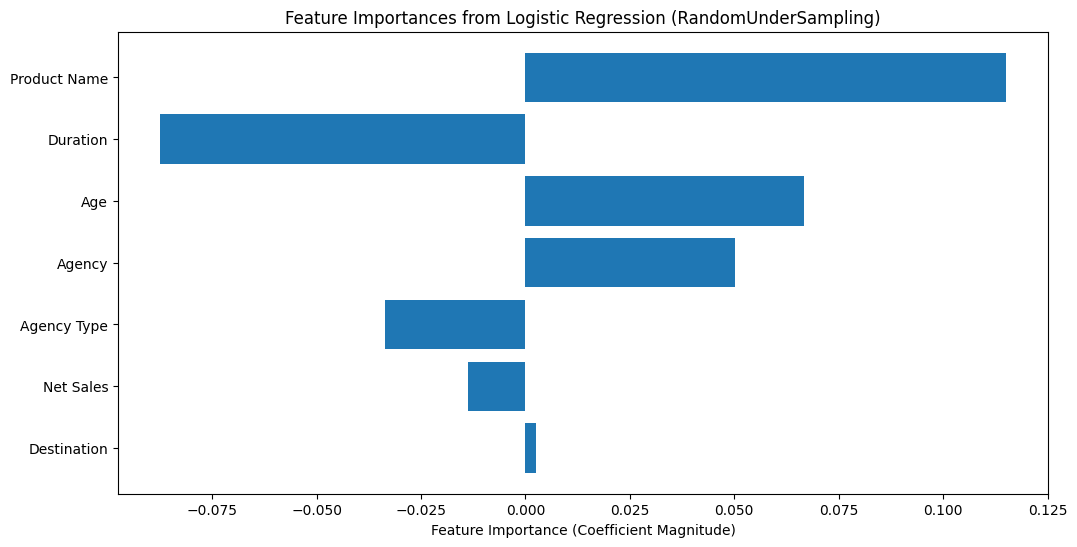

In [601]:
# Mengekstrak feature names dan importances
feature_names = list(sorted_feature_importances.keys())
importances = list(sorted_feature_importances.values())

# Membuat bar plot
plt.figure(figsize=(12, 6))
plt.barh(range(len(importances)), importances, align='center')
plt.yticks(range(len(importances)), feature_names)
plt.xlabel('Feature Importance (Coefficient Magnitude)')
plt.title('Feature Importances from Logistic Regression (RandomUnderSampling)')
plt.gca().invert_yaxis()  

plt.show()


In [602]:
best_over.fit(xtrain, ytrain)

coefficients = best_over['model'].coef_[0]
feature_names = X_train.columns 
feature_importances = dict(zip(feature_names, coefficients))

sorted_feature_importances = {k: v for k, v in sorted(feature_importances.items(), key=lambda item: abs(item[1]), reverse=True)}
 
print(sorted_feature_importances)

{'Duration': -0.810021226572685, 'Age': 0.5713949058940475, 'Net Sales': 0.47858838979088236, 'Destination': 0.27831490142009147, 'Product Name': 0.12325064967145853, 'Agency': -0.11090584233134414, 'Agency Type': -0.07606683233940029}


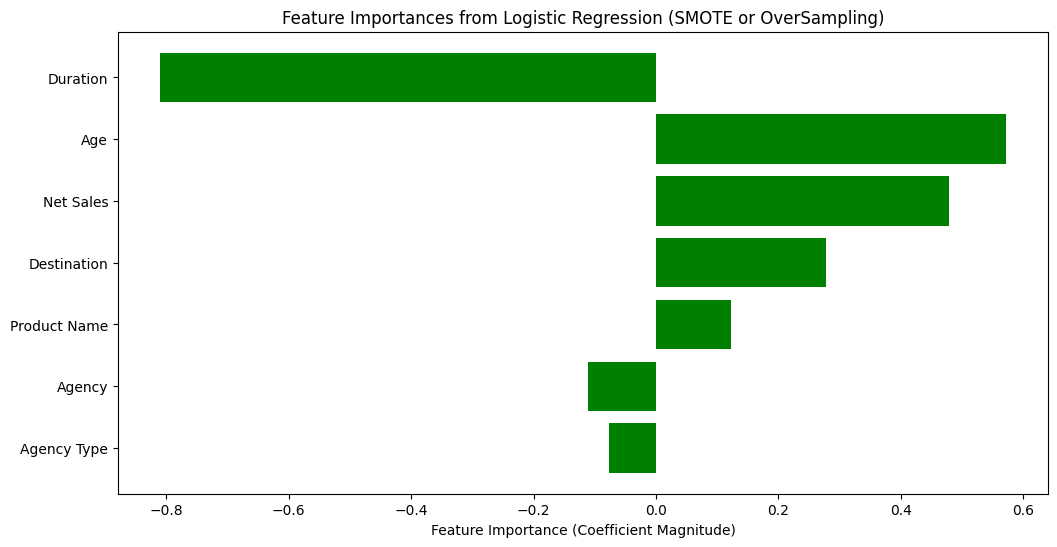

In [603]:
# Mengekstrak feature names dan importances
feature_names = list(sorted_feature_importances.keys())
importances = list(sorted_feature_importances.values())

# Membuat bar plot
plt.figure(figsize=(12, 6))
plt.barh(range(len(importances)), importances, align='center', color = 'green')
plt.yticks(range(len(importances)), feature_names)
plt.xlabel('Feature Importance (Coefficient Magnitude)')
plt.title('Feature Importances from Logistic Regression (SMOTE or OverSampling)')
plt.gca().invert_yaxis()  

plt.show()


Ketika melihat feature importances ini, arah dari feature importance menjadi faktor penting. Pada kasus ini, ketika **coefficient magnitude** bernilai **positif** maka artinya kemungkinan seseorang melakukan **klaim** akan bergantung pada fitur terkait. Sebaliknya jika nilai coefficient magnitude bernilai **negatif** maka artinya kemungkinan seseorang **tidak** melakukan klaim akan bergantung pada fitur terkait. 

Perbandingan antara model dengan undersampling dan oversampling:
1. **Product name** menjadi fitur paling berpengaruh pada undersampling sedangkan oversampling yaitu **Duration** yang product name mempengaruhi kemungkinan seseorang melakukan klaim sedangkan Duration mempengaruhi kemungkinan sesorang tidak melakukan klaim. 
2. Urutan fitur paling penting untuk Undersampling adalah **Product Name, Duration, Age, Agency, Agency Type, Net Sales, Destination.** Sedangkan Oversampling yaitu **Duration, Age, Net Sales, Destination, Product Name, Agency, Agency Type.**
3. **Net sales, Agency, Destination** memiliki arah coefficient magnitude yang berbeda antara dengan undersampling dan oversampling. 

Dari perbandingan ini, MUNGKIN tingkat kepentingan dari setiap fitur dapat digunakan untuk menentukan jenis sampling mana yang perlu digunakan untuk kepentingan prediksi tertentu. Contohnya jika kita ingin melakukan prediksi kemungkinan seseorang akan melakukan klaim atau tidak tapi tidak bergantung pada faktor jenis produk asuransi yang dipegang nasabah maka dapat digunakan SMOTE. Atau jika kita ingin melakukan prediksi orang melakukan klaim atau tidak tanpa data net sales karena prediksi ini ditujukan untuk memberi biaya premi yang sesuai dengan peluang calon nasabah melakukan klaim di masa yang akan datang sejak pembayaran pertama (data net sales belum ada), maka akan lebih baik menggunakan Random Under Sampler. 

### Final fit

#### Logistic Regression (SMOTE sampling)

Model yang dipilih sebagai model akhir pada kasus ini adalah Logistic Regression dengan SMOTE atau oversampling dikarenakan target kelas 1 yang sangat sedikit sehingga dengan undersampling tinggi kemungkinannya bahwa model machine learning mempelajari data yang memiliki kehilangan informasi-informasi penting karena perlunya penyesuaian jumlah kelas 0 menjadi sebanyak kelas 1. Sehingga dalam kasus ini mungkin model oversampling ini akan lebih mewakilkan dataset yang dimiliki walau secara nilai recall keduanya tidak berbeda jauh bahkan metode undersampling menghasilkan recall yang lebih baik.

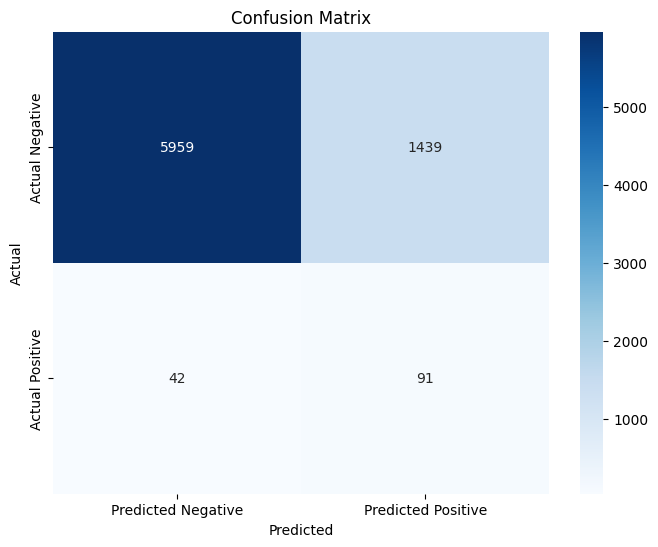

In [538]:
conf_matrix = confusion_matrix(ytest, pred_over)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])

# Set axis labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

In [632]:
best_over = grid_over.best_estimator_
best_over.fit(xtrain,ytrain)
pred_over = best_over.predict(xtest)
print(classification_report(ytest,pred_over))

              precision    recall  f1-score   support

           0       0.99      0.81      0.89      7398
           1       0.06      0.68      0.11       133

    accuracy                           0.80      7531
   macro avg       0.53      0.75      0.50      7531
weighted avg       0.98      0.80      0.88      7531



## Conclusion & Recommendation

Berdasarkan hasil classification report dari model ini, dapat disimpulkan bahwa model ini dapat memprediksi 81% dari seluruh nasabah yang tidak melakukan klaim dengan kesalahan prediksi sebanyak 19% (memprediksi false negative). Selain itu model ini dapat memprediksi 68% dari seluruh nasabah yang melakukan klaim dengan kesalahan prediksi sebanyak 32% (memprediksi false positif).  


Jika : <br>
Rata-rata biaya yang dibayarkan untuk asuransi perjalanan individu berumur 30 tahun adalah \$20 dimana biaya ini adalah 5% dari total biaya perjalanan mereka (\$400 per individu). Sebut saja semuanya mengambil produk Cancellation plan yang menjanjikan penggantian 50% dari total biaya perjalanan jika individu membatalkan perjalanan (\$200 per individu).  


Tanpa model machine learning jika nasabah sebanyak 1200 orang :<br>
1. Keuntungan = 1200 orang X 20= 24 ribu dollar
2. Alokasi dana = harus mempersiapkan $200 X 1200 orang = 240 ribu dollar dengan asumsi semua orang melakukan klaim. 

Dengan model machine learning dan ternyata diprediksi 1000 orang melakukan klaim dan 200 orang tidak melakukan klaim: 
1. Keuntungan = 1000 orang X 20= 20 ribu dollar
Dengan skor Recall kelas 0 yang didapatkan, dapat dilakukan:<br>
2. Alokasi dana = mengetahui 81% orang tidak akan melakukan klaim maka dana yang perlu dipersiapkan hanya 19% X 1000 orang X \$ 200 = 38 ribu dollar (mempersiapkan orang-orang yang nyatanya melakukan klaim (False negative)).
3. Sisa 200 - 38 ribu dollar = 162 ribu dollar + keuntungan 20 ribu dollar dapat dialokasikan ke investasi seperti reksadana dengan asumsi return 7% per tahun maka perusahaan dapat memperoleh 40 ribu dollar atau setara dengan mendapatkan 2000 nasabah baru tanpa mencari dalam kurun waktu 3 tahun.
Dengan skor Recall kelas 1 yang didapatkan, dapat dilakukan : <br>
4. Alokasi dana  = \$200 x 200 orang = 40 ribu dollar dimana terdapat kemungkinan 32 % dari dana ini yaitu dana berlebih sebanyak 12.8 ribu dollar (karena masuk ke dalam kelas False Positive, terprediksi klaim tapi nyatanya tidak). 


*30 tahun dipilih karena peak pengguna asuransi perjalanan pada dataset ini adalah pada 36 tahun.<br>
*Cancellation plan dipilih karena produk ini paling banyak diminati pada dataset ini.<br>
*20 dollar adalah besar biaya yang paling sering dikeluarkan pemegang polis. 

Sumber : https://www.forbes.com/advisor/travel-insurance/average-travel-insurance-cost/


## Recommendation
- Menambahkan fitur - fitur lain kedepannya jika ingin melakukan prediksi target y yaitu status klaim asuransi tapi yang bertujuan memberi biaya premi yang sesuai. Misalnya mengumpulkan data dari calon nasabah yaitu pernahkah calon nasabah memiliki asuransi atau jumlah asuransi yang sudah pernah dimiliki calon nasabah. Selain itu untuk tujuan seperti ini, fitur Net-Sales tidak dapat digunakan maka akan sebaiknya menggunakan model yang memiliki feature importance Net-Sales paling rendah (seperti pada Logistic Regression dengan randomundersampling).
- Menggumpulkan data orang-orang yang melakukan klaim asuransi (jika memungkinkan)
- Mencari tahu ordinal encoding untuk setiap produk asuransi dikarenakan setiap produk memiliki coverage yang berbeda-beda dan tentunya memiliki tingkatan tertentu, penting untuk memiliki domain knowledge terkait ini. 
- Melakukan explorasi model machine learning lainnya seperti SVM atau support Vector Machines.  

